In [133]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [134]:
data = pd.read_csv('HousePrices.csv')

In [135]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [137]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [138]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [139]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

#### Numerical:
#### -----------------------
1) 'price'
2) 'bedrooms'
3) 'bathrooms'
4) 'sqft_living'
5) 'sqft_lot'
6) floors'
7) 'waterfront'
7) 'view'
8) 'condition'
9) 'sqft_above',
10) 'sqft_basement'
11) 'yr_built'
12) 'yr_renovated'

#### Categorical:
#### ----------------------
1) 'street'
2) 'city'
3) 'statezip'
4) 'country'

In [140]:
  data['price'] = pd.to_numeric(data.price, errors='coerce')

<Figure size 400x200 with 0 Axes>

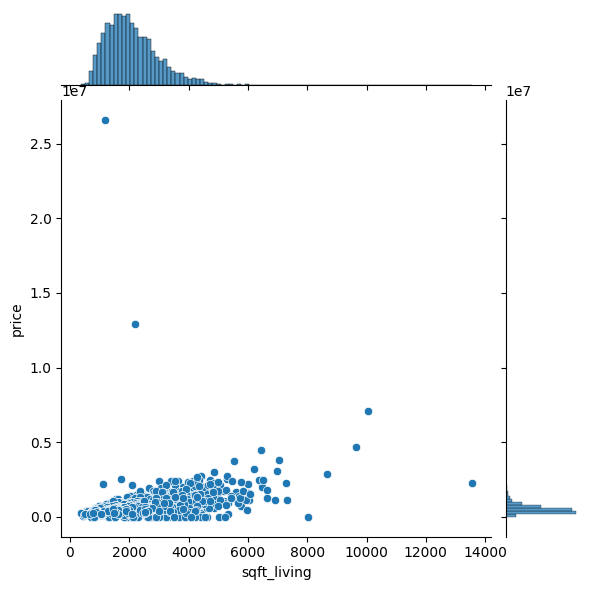

In [141]:
#Now we need to find outliers before scaling and trasformation
#We can understand relations between features
plt.figure(figsize=(4, 2))
sns.jointplot(kind='scatter', x="sqft_living", y="price", data=data)

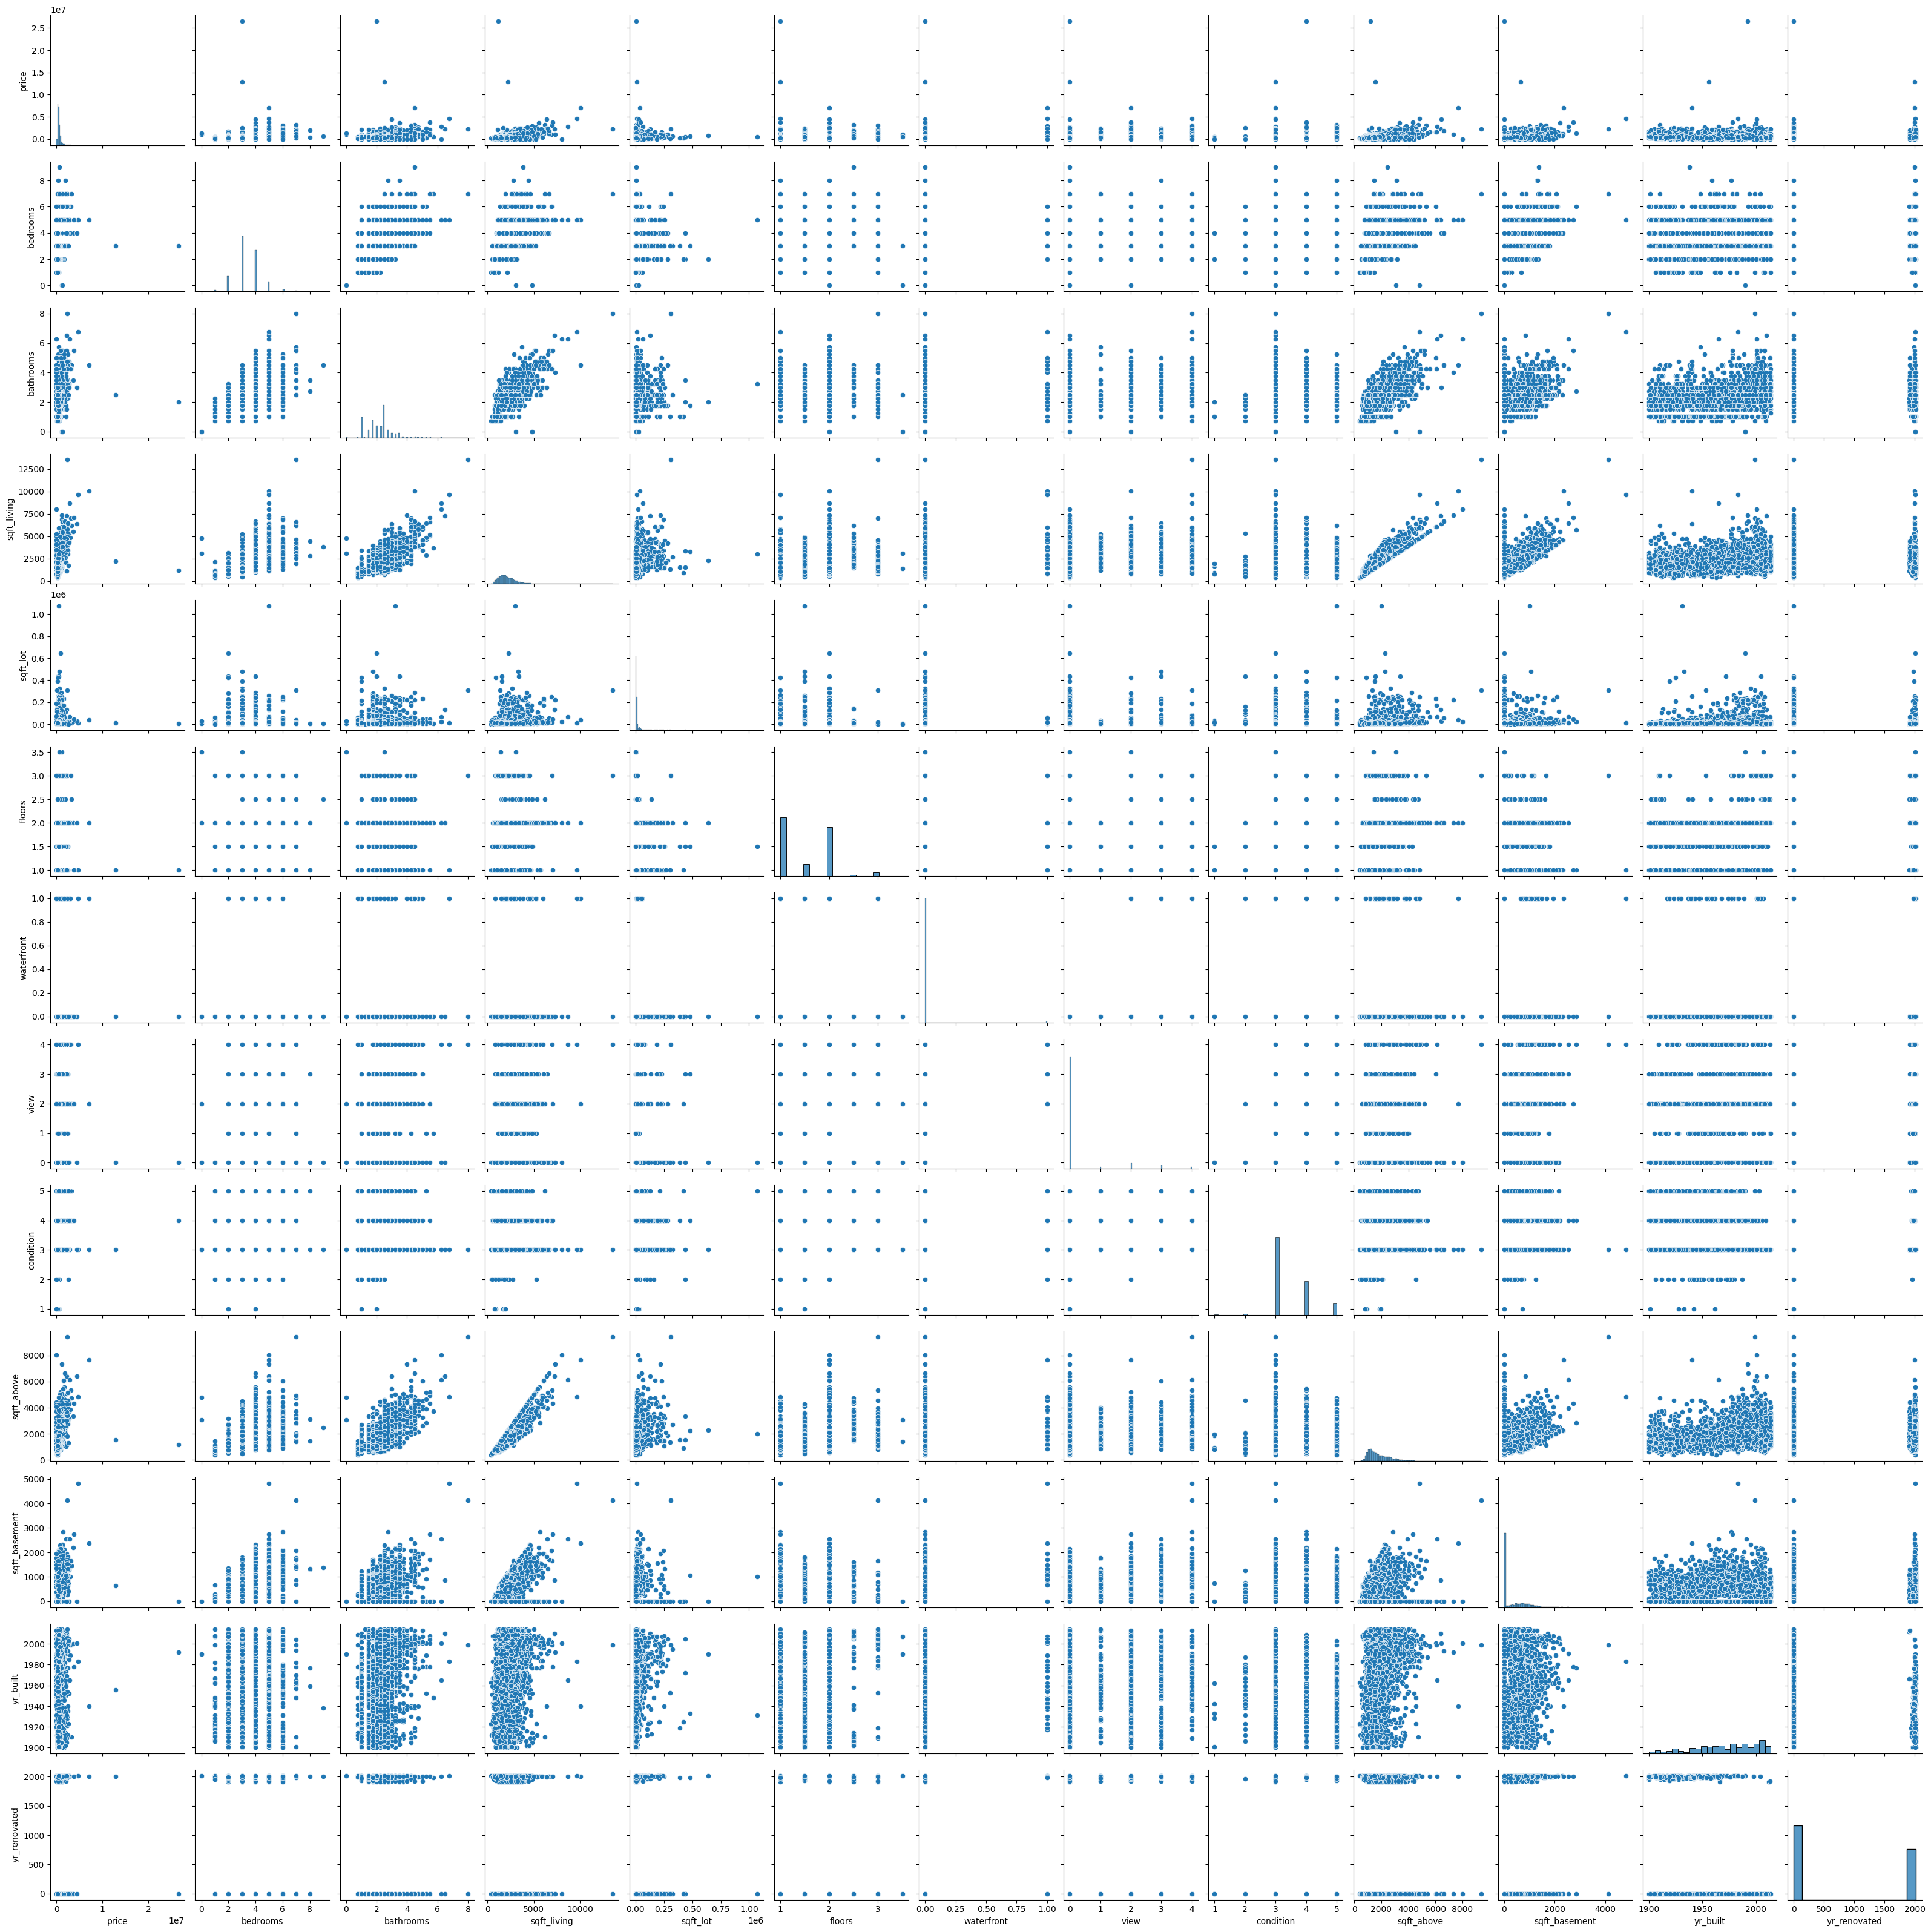

In [143]:
sns.pairplot(data=data)

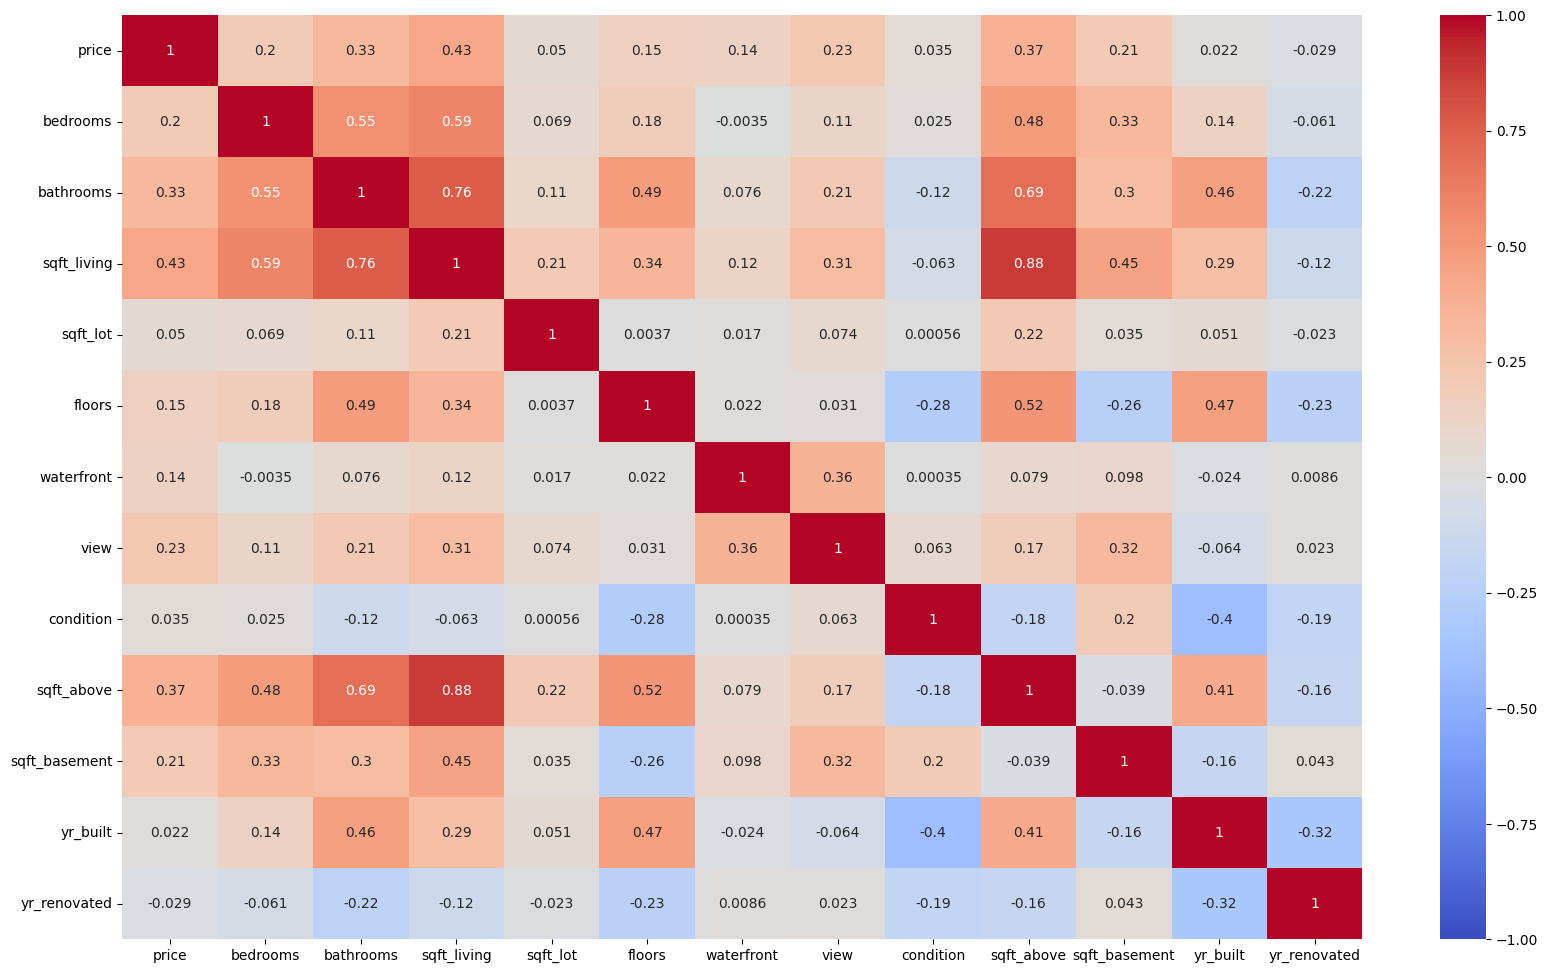

In [145]:
plt.figure(figsize=(20, 12))
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_cols.corr(), annot=True, vmin=-1, cmap='coolwarm')
plt.show()

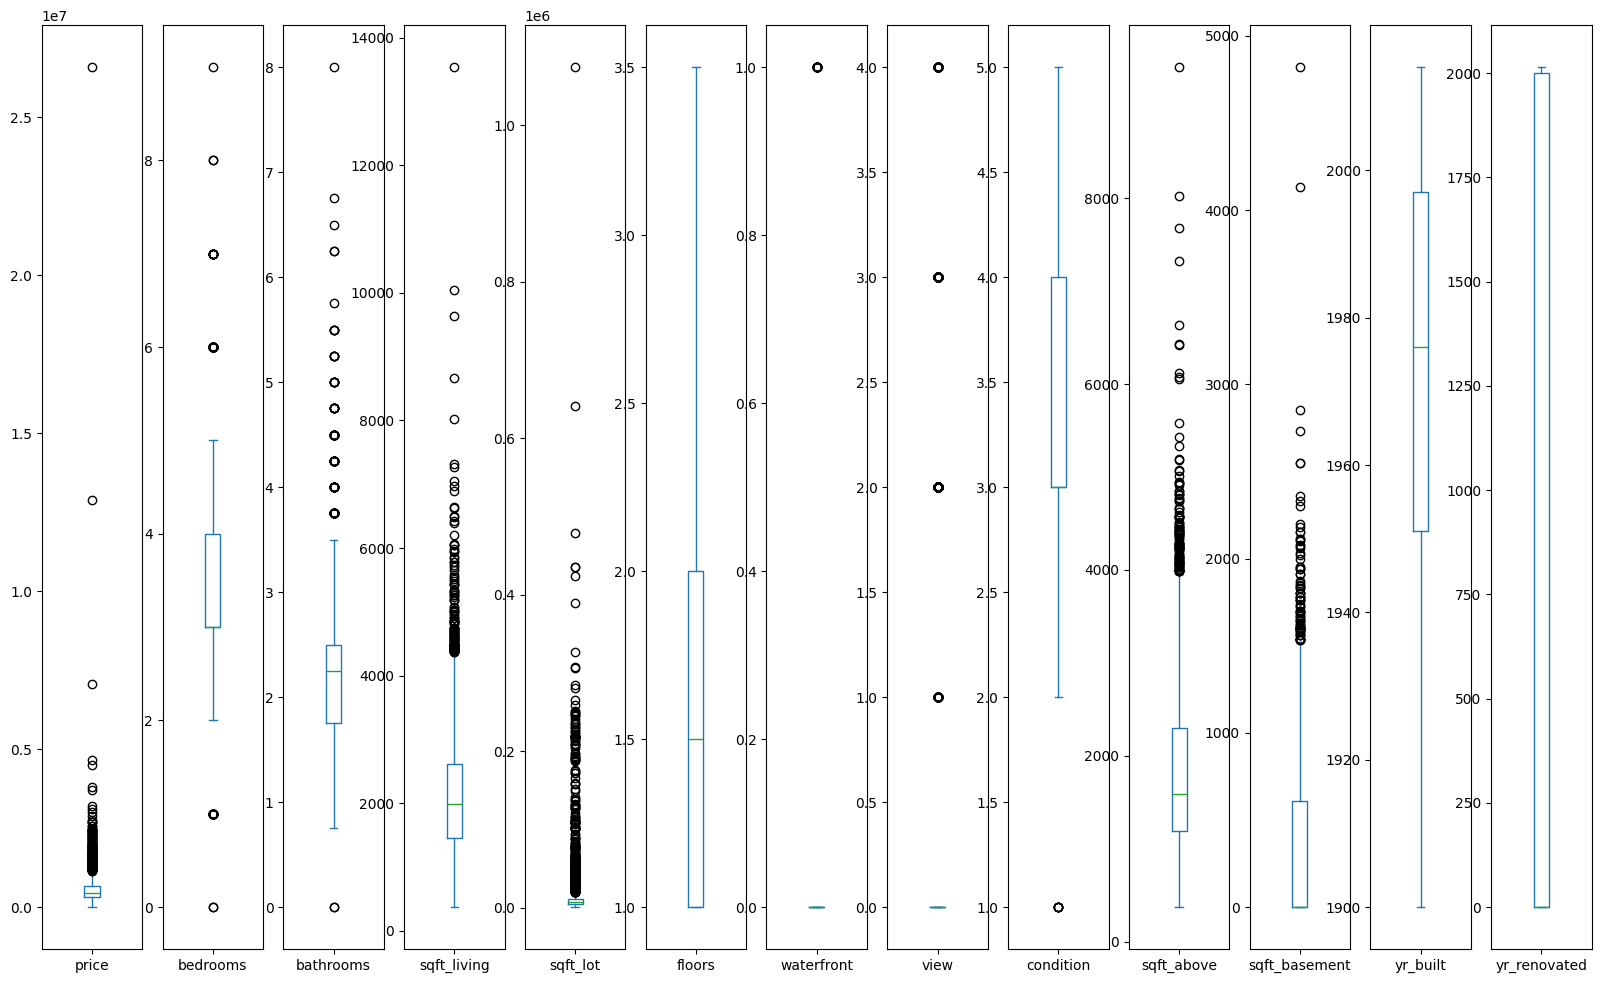

In [147]:
data.plot(kind="box",subplots=True,figsize=(20,12))
plt.show()

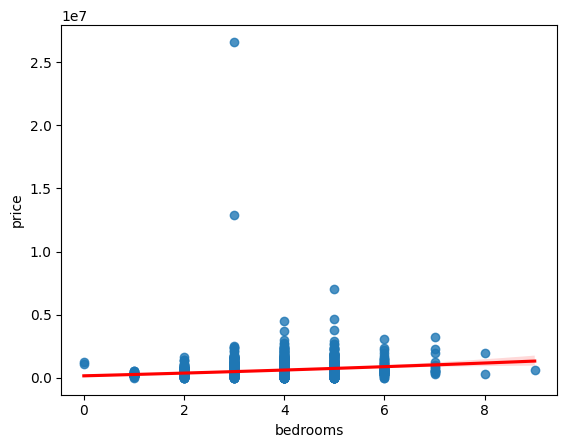

In [148]:
sns.regplot(x="bedrooms",
            y="price",
            data=data,
            line_kws = {'color':'red'},
            order=2)
plt.show()

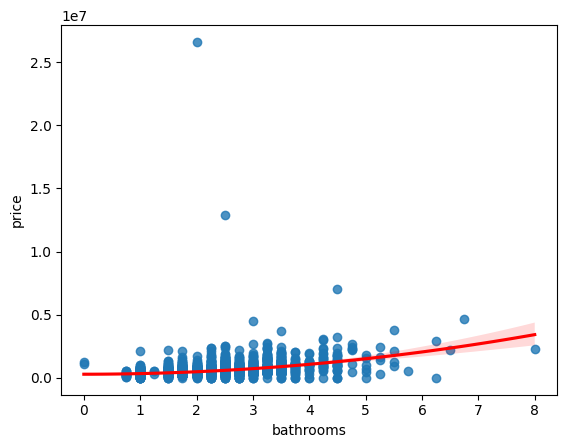

In [149]:
sns.regplot(x="bathrooms",
            y="price",
            data=data,
            line_kws = {'color':'red'},
            order=2)
plt.show()

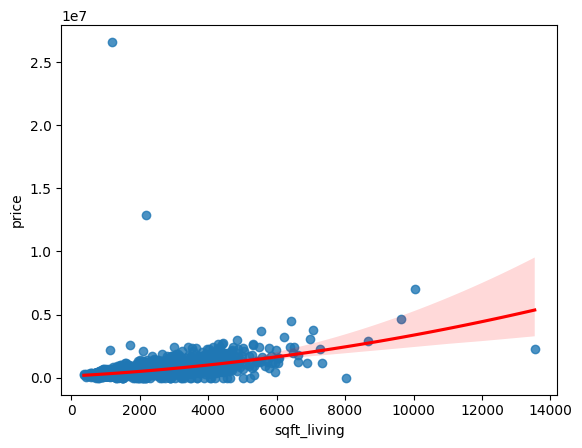

In [150]:
sns.regplot(x="sqft_living",
            y="price",
            data=data,
            line_kws = {'color':'red'},
            order=2)
plt.show()

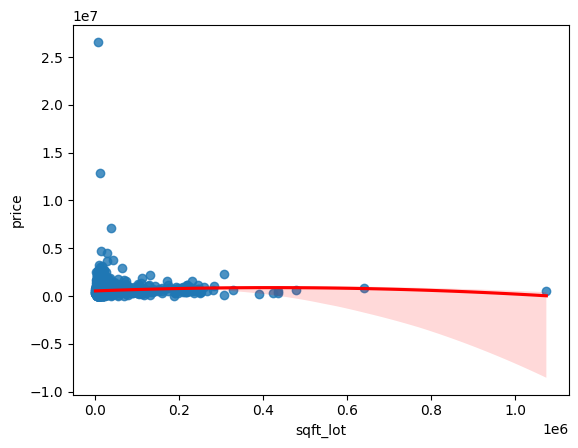

In [151]:
sns.regplot(x="sqft_lot",
            y="price",
            data=data,
            line_kws = {'color':'red'},
            order=2)
plt.show()

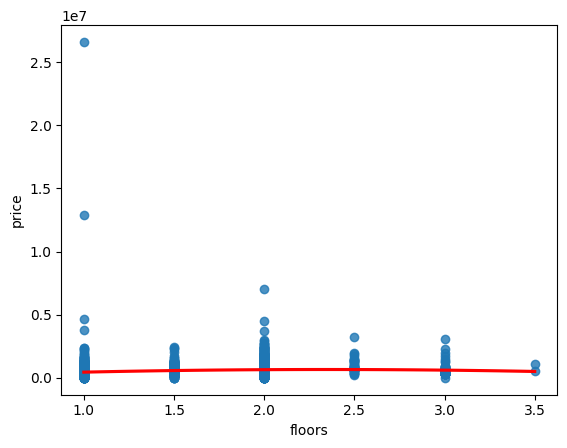

In [152]:
sns.regplot(x="floors",
            y="price",
            data=data,
            line_kws = {'color':'red'},
            order=2)
plt.show()

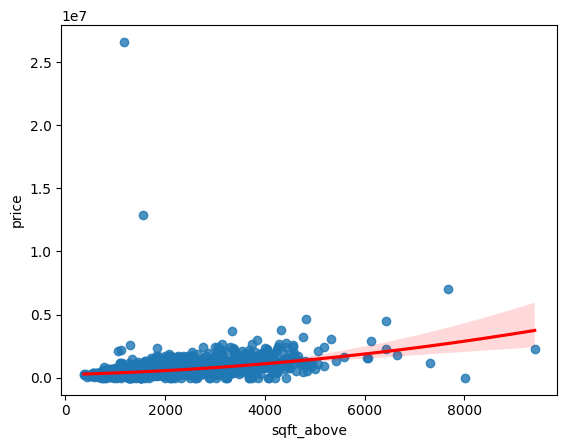

In [153]:
sns.regplot(x="sqft_above",
            y="price",
            data=data,
            line_kws = {'color':'red'},
            order=2)
plt.show()

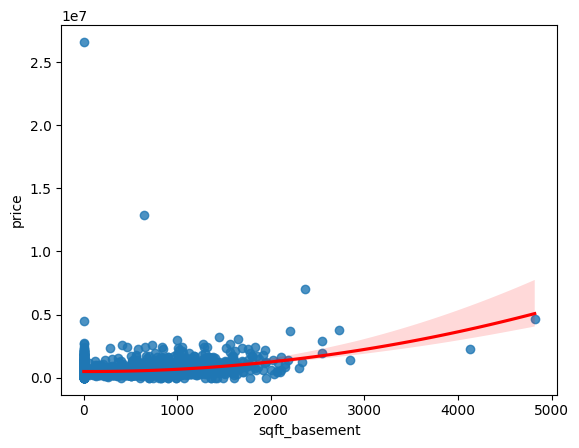

In [154]:
sns.regplot(x="sqft_basement",
            y="price",
            data=data,
            line_kws = {'color':'red'},
            order=2)
plt.show()

In [155]:
# We will drop the not required features.
Final_Data = data.drop(['date', 'yr_built', 'yr_renovated'], axis=1)

In [156]:
Final_Data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,9105 170th Ave NE,Redmond,WA 98052,USA


In [157]:
#We can use ordinal encoder for "street", "city","statezip","country"
from sklearn.preprocessing import OrdinalEncoder

In [160]:
data.country.unique()

array(['USA'], dtype=object)

In [158]:
oe=OrdinalEncoder()
Final_Data[["street","city","statezip","country"]]=oe.fit_transform(Final_Data[["street","city","statezip","country"]])

In [161]:
Final_Data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1522.0,36.0,62.0,0.0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,3899.0,35.0,58.0,0.0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,2291.0,18.0,26.0,0.0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,4263.0,3.0,7.0,0.0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,4352.0,31.0,31.0,0.0


In [162]:
#Now we can perform scaling and transformation
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [164]:
data_mms = mms.fit_transform(Final_Data)

In [165]:
x = pd.DataFrame(data_mms,columns=['price','bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront','view','condition',
        'sqft_above', 'sqft_basement', 'steet', 'city', 'statezip', 'country'])

In [166]:
x.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,steet,city,statezip,country
0,0.011771,0.333333,0.18750,0.073652,0.006775,0.2,0.0,0.0,0.50,0.107301,0.000000,0.336428,0.837209,0.815789,0.0
1,0.089658,0.555556,0.31250,0.249051,0.007835,0.4,0.0,1.0,1.00,0.331858,0.058091,0.861848,0.813953,0.763158,0.0
2,0.012862,0.333333,0.25000,0.118451,0.010534,0.0,0.0,0.0,0.75,0.172566,0.000000,0.506410,0.418605,0.342105,0.0
3,0.015795,0.333333,0.28125,0.123766,0.006885,0.0,0.0,0.0,0.75,0.069690,0.207469,0.942308,0.069767,0.092105,0.0
4,0.020684,0.444444,0.31250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.085177,0.165975,0.961981,0.720930,0.407895,0.0


In [167]:
from sklearn.model_selection import train_test_split

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x.drop(columns=["price"]),
                           x.price,
                          random_state=60,
                          test_size=0.4)

In [169]:
x_train.shape

(2760, 13)

In [170]:
x_test.shape

(1840, 13)

In [171]:
y_train.shape

(2760,)

In [172]:
y_test.shape

(1840,)

In [173]:
from sklearn.linear_model import LinearRegression

In [174]:
lr=LinearRegression()

In [176]:
lr.fit(x_train,y_train) # Training on 60% data x,y

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [177]:
y_pred=lr.predict(x_test)

In [178]:
lr.score(x_test,y_test)*100

32.0527024987061

In [179]:
from sklearn.metrics import r2_score #R-Squared
r2_score(y_test,y_pred)

0.320527024987061

In [180]:
from sklearn.metrics import mean_squared_error #Mean Square Error

In [181]:
mean_squared_error(y_test, y_pred)

0.00024384955019985603

In [182]:
from sklearn.metrics import mean_absolute_error #Mean Absolute Error

In [183]:
mean_absolute_error(y_test,y_pred)

0.006848869960395514

In [184]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

0.015615682828485472
